In [215]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [220]:
pd.__version__

'2.0.3'

In [134]:
df=pd.read_excel(r"C:\Users\SmrutisikhaJena\Downloads\ClaimDetailsnew_.xlsx")
df

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,YearBuilt,Stories,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2003862,2019-04-18 00:00:00.000,5010232,2019-05-03 08:09:04.880,2019-07-01 00:00:00.000,back up causing sewage water in from the drain...,Closed,rgibson,BOP Property,"ETHERIDGE OWNERS, INC.",...,1965,8,ClassCode:65146,MasonryNonCombustible,"3114 WISCONSIN AVENUE, NW\n\rWASHINGTON, DC 20016",20016,7626.78,4758237.0,30800,5090954
1,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
2,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
3,2005666,2020-04-30 00:00:00.000,7120072,2020-05-15 12:29:16.837,2020-10-10 00:00:00.000,Façade sign was torn from the building and han...,Closed,ahart,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,3009.98,3640000.0,35000,5426100
4,2006935,2021-01-27 00:00:00.000,7120072,2021-02-12 13:24:24.330,2021-10-10 00:00:00.000,Fire damage to the building,Closed,rgibson,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
203,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
204,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000
205,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000


In [135]:
selected_columns = ['Jurisdiction', 'CoverageType', 'Deductible', 'Limit', 'InjuryCause',
                    'YearBuilt', 'Stories', 'Comments', 'ConstructionTypeDesc', 'ZipCode', 'LossAmount','E2Value','SquareFootage','BuildingLimit']
df = df[selected_columns]
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,Comments,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,ClassCode:65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,ClassCode:65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,ClassCode:65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,ClassCode:59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,ClassCode:59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,4617938.0,24440,3666000
203,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,4617938.0,24440,3666000
204,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,2231296.8,11280,1692000
205,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,2231296.8,11280,1692000


In [136]:
#change col name as classcode & keep only classcode value
df['Comments'] = df['Comments'].str.replace('ClassCode:', '')
df = df.rename(columns={'Comments': 'ClassCode'})
df

C:\Users\SmrutisikhaJena\AppData\Local\Temp\ipykernel_29532\3748033824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments'] = df['Comments'].str.replace('ClassCode:', '')


,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
203,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
204,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000
205,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000


In [137]:
#remove - from zipcode value
df["ZipCode"] = df["ZipCode"].str.replace("-", "")
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
203,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
204,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000
205,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000


In [138]:
#remove null value from LossAmount
df = df[pd.to_numeric(df['LossAmount'], errors='coerce').notna()]
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000


In [139]:
def extract_amount(value):
    match = re.search(r'(\d+\.\d+)', str(value))
    if match:
        return float(match.group(1))
    else:
        return None


In [140]:
df['LossAmount'] = df['LossAmount'].apply(extract_amount)
df = df.dropna(subset=['LossAmount'])
df

C:\Users\SmrutisikhaJena\AppData\Local\Temp\ipykernel_29532\1937645644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LossAmount'] = df['LossAmount'].apply(extract_amount)


,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000


In [141]:
# in limit and deductible column, separate the alphabetical and numeric value in two separate columns
df['LossAmount'].fillna(0, inplace=True)
# df['Deductible'] = df['Deductible'].str.extract(r'(\d+\.\d+)').astype(float)
# df['Limit'] = df['Limit'].str.extract(r'(\d+\.\d+)').astype(float)
df['limit_type'] = df['Limit'].str.extract(r'([a-zA-Z]+)')
df['Limit_val'] = df['Limit'].str.extract(r'(\d+)')
df['Deductible_type'] = df['Deductible'].str.extract(r'([a-zA-Z]+)')
df['Deductible_val'] = df['Deductible'].str.extract(r'(\d+)')
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500


In [142]:
from datetime import datetime
df['YearGap'] = datetime.now().year - df['YearBuilt']
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500,58
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000,54
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000,54
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500,11
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000,144
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500,69


In [143]:
df=df.drop(columns=["Limit", "Deductible", "YearBuilt"])
df

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,Dist. of Columbia,BOP-Building,WATER,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500,58
1,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000,54
2,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000,54
3,Pennsylvania,BOP-Building,WIND,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500,11
4,Pennsylvania,BOP-Building,FIRE,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,VEHICLES,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000,144
181,North Carolina,BOP-Building,WIND,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
182,North Carolina,BOP-Building,WIND,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
183,Pennsylvania,BOP-Building,FIRE,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500,69


In [156]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
col_list = ["Jurisdiction", "CoverageType", "InjuryCause", "ClassCode", "ConstructionTypeDesc","ZipCode","limit_type","Deductible_type"]
for col in col_list:
    df[col]= label_encoder.fit_transform(df[col])
df


,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,E2value_new
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58,2.774753e+06
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54,1.395467e+06
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54,1.395467e+06
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11,2.957420e+06
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11,2.957420e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000,144,1.975151e+05
181,3,0,8,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000,37,7.255792e+04
182,3,0,8,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000,37,7.255792e+04
183,5,0,1,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500,69,3.324720e+05


In [157]:
columns_to_string = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type',
                    'Deductible_type']
df[columns_to_string] = df[columns_to_string].astype(str)
columns_to_int = ['Stories', 'Deductible_val']
df.fillna(0, inplace=True)
df[columns_to_int] = df[columns_to_int].astype('int')
df['Limit_val'] = df['Limit_val'].astype('double')
#df['YearBuilt'] = df['YearBuilt'].astype('double')
df

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,E2value_new
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58,2.774753e+06
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54,1.395467e+06
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54,1.395467e+06
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11,2.957420e+06
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11,2.957420e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000,144,1.975151e+05
181,3,0,8,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000,37,7.255792e+04
182,3,0,8,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000,37,7.255792e+04
183,5,0,1,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500,69,3.324720e+05


In [145]:
df['ZipCode'].value_counts()

ZipCode
18040    4
18102    4
15212    3
15661    3
17070    3
        ..
15218    1
16637    1
15456    1
44109    1
44641    1
Name: count, Length: 86, dtype: int64

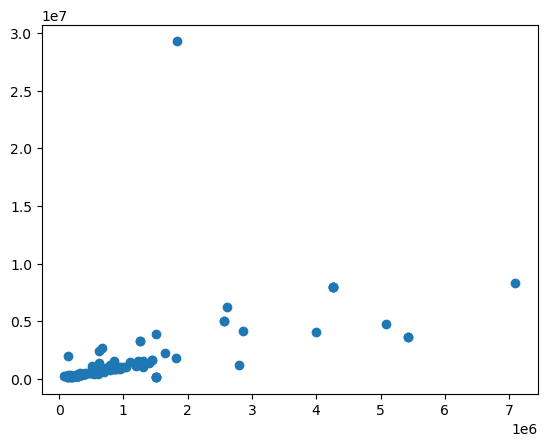

In [146]:
plt.scatter(df['BuildingLimit'], df['E2Value'])

In [147]:
corr = df['E2Value'].corr(df['BuildingLimit'])
print(corr)

0.5450360545335583


In [148]:
df['E2value_new'] = df['BuildingLimit']*corr
df

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,E2value_new
0,Dist. of Columbia,BOP-Building,WATER,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568.0,FixedDollar,2500,58,2.774753e+06
1,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320.0,FixedDollar,5000,54,1.395467e+06
2,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1.0,FixedDollar,5000,54,1.395467e+06
3,Pennsylvania,BOP-Building,WIND,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296.0,FixedDollar,2500,11,2.957420e+06
4,Pennsylvania,BOP-Building,FIRE,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728.0,FixedDollar,2500,11,2.957420e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,VEHICLES,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389.0,FixedDollar,1000,144,1.975151e+05
181,North Carolina,BOP-Building,WIND,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125.0,FixedDollar,1000,37,7.255792e+04
182,North Carolina,BOP-Building,WIND,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125.0,FixedDollar,1000,37,7.255792e+04
183,Pennsylvania,BOP-Building,FIRE,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500.0,FixedDollar,2500,69,3.324720e+05


In [149]:
from sklearn import preprocessing
label_encoders = {}
label_encoders['ZipCode'] = preprocessing.LabelEncoder()
df['ZipCode'] = label_encoders['ZipCode'].fit_transform(df['ZipCode'])
df

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,E2value_new
0,Dist. of Columbia,BOP-Building,WATER,8,65146,MasonryNonCombustible,59,7626.78,4758237.00,30800,5090954,Standard,550637568.0,FixedDollar,2500,58,2.774753e+06
1,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,65,17492.12,5042916.00,30480,2560320,Standard,2560320.0,FixedDollar,5000,54,1.395467e+06
2,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,65,17492.12,5042916.00,30480,2560320,Blanket,1.0,FixedDollar,5000,54,1.395467e+06
3,Pennsylvania,BOP-Building,WIND,1,59999,MasonryNonCombustible,34,3009.98,3640000.00,35000,5426100,Standard,704688296.0,FixedDollar,2500,11,2.957420e+06
4,Pennsylvania,BOP-Building,FIRE,1,59999,MasonryNonCombustible,34,48695.03,3640000.00,35000,5426100,Standard,732875728.0,FixedDollar,2500,11,2.957420e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,VEHICLES,2,65141,Frame,73,1710.00,339996.00,1954,362389,Standard,362389.0,FixedDollar,1000,144,1.975151e+05
181,North Carolina,BOP-Building,WIND,1,65141,Frame,66,76107.69,147168.00,1008,133125,Standard,133125.0,FixedDollar,1000,37,7.255792e+04
182,North Carolina,BOP-Building,WIND,1,65141,Frame,66,4269.09,147168.00,1008,133125,Standard,133125.0,FixedDollar,1000,37,7.255792e+04
183,Pennsylvania,BOP-Building,FIRE,2,65144,Frame,53,14320.07,474599.00,4040,610000,Standard,701500.0,FixedDollar,2500,69,3.324720e+05


In [169]:
df

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,E2value_new
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58,2.774753e+06
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54,1.395467e+06
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54,1.395467e+06
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11,2.957420e+06
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11,2.957420e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000,144,1.975151e+05
181,3,0,8,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000,37,7.255792e+04
182,3,0,8,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000,37,7.255792e+04
183,5,0,1,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500,69,3.324720e+05


In [170]:
X = df.drop(['E2value_new'],axis=1)
y = df['E2value_new']

In [171]:
X

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000,144
181,3,0,8,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000,37
182,3,0,8,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000,37
183,5,0,1,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500,69


In [172]:
#X= df[['BuildingLimit', 'YearGap', 'ZipCode']]
# y = df['E2Value']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [174]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [175]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pickle
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from lightgbm import Dataset

In [176]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [177]:
y_pred = model.predict(X_test)

In [178]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2= r2_score(y_test, y_pred)
R2

1.0

In [168]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
R2= r2_score(y_test, y_pred)
R2

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Jurisdiction: object, CoverageType: object, InjuryCause: object, ClassCode: object, ConstructionTypeDesc: object, ZipCode: object, limit_type: object, Deductible_type: object

In [179]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2= r2_score(y_test, y_pred)
R2

0.9913164581549337

In [182]:
# today = datetime.today().strftime('%Y%m%d')
# with open('./data/training/output/xgr_'+today+'.pkl', 'wb') as file:
#         pickle.dump(xgr, file)

In [192]:
# from utility.modelsaving import *

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\SmrutisikhaJena\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SmrutisikhaJena\AppData\Local\Temp\ipykernel_22212\1201532942.py", line 1, in <module>
    from utility.modelsaving import *
  File "C:\Users\SmrutisikhaJena\Documents\GitHub\Risk_Predictive_Model\utility\modelsaving.py", line 6, in <module>
    X= df.drop(columns=["E2Value"])
       ^^^^^^^
AttributeError: 'str' object has no attribute 'drop'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SmrutisikhaJena\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SmrutisikhaJena\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, 

In [201]:
df_new=pd.read_excel(r"C:\Users\SmrutisikhaJena\Documents\Data for loss amount prediction.xlsx")
df_new

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,Stories,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,ExternalKey,SquareFootage,BuildingLimit,E2Value
0,NaN,2019-05-27 00:00:00.000,7150080,2019-10-29 08:21:23.337,2020-05-15 00:00:00.000,Hail damage to the building,Closed,rgibson,BOP Property,GLEN KEGLEY,...,1,ClassCode:65141,Frame,"1165 DATE ST\n\rFAIRBORN, OH 45324",45324,525.60,b4D464A07531B48AD9584C868B0CB8862,100,144000.00,NaN
1,2006487.0,2020-07-10 00:00:00.000,7176669,2020-11-04 12:54:20.113,2020-12-28 00:00:00.000,Storm damage to the roof,Closed,ppavlik,BOP Property,"zIngenuity Management, LLC",...,1,ClassCode:65146,JoistedMasonry,"5420 Lonsdale North\n\rColumbus, OH 43232",43232,NaN,b3D02D4AABF094ED085FC37A057DB1C6B,250,23040.00,NaN
2,2006487.0,2020-07-10 00:00:00.000,7176669,2020-11-04 12:54:20.113,2020-12-28 00:00:00.000,Storm damage to the roof,Closed,ppavlik,BOP Property,"zIngenuity Management, LLC",...,1,ClassCode:65146,JoistedMasonry,"5420 Lonsdale North\n\rColumbus, OH 43232",43232,NaN,b3D02D4AABF094ED085FC37A057DB1C6B,250,23040.00,NaN
3,2007590.0,2021-07-10 00:00:00.000,5080437,2021-07-14 10:23:58.490,2021-10-26 00:00:00.000,A fire near the property caused damage to the ...,Closed,swright,BOP Property,IRIS COMMONS ASSOCIATES,...,2,ClassCode:65144,Frame,"618 CENTER STREET\n\rWILLIAMSPORT, PA 17701",17701,2265.00,b2415B7E5759242AEB5B62C3910BD65C1,300,60786.00,NaN
4,2005124.0,2020-01-31 00:00:00.000,643744,2020-02-03 09:58:15.567,2020-11-20 00:00:00.000,Fire,Closed,ahart,BOP Property,"Octavia Hill Association, Inc.",...,12,ClassCode:65144,JoistedMasonry,"1929 S. BEECHWOOD STREET\n\rPHILADELPHIA, PA 1...",19145,146441.35,b65CC72090C3640BABCC1040285C3DF32,380,41081.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,2010355.0,2022-01-15 00:00:00.000,7156220,2022-01-20 13:24:04.913,2023-01-01 00:00:00.000,Water intrusion from boiler which ran into ele...,Closed,bbrent,BOP Property,Amurcon Corp of Virginia,...,8,ClassCode:65132,MasonryNonCombustible,"1021 German School Road\n\rRichmond, VA 23225",23225,NaN,b42F07BB3D0EA472F8168C739BB51FD49,182744,26195067.00,NaN
6311,2008366.0,2022-01-15 00:00:00.000,7156220,2022-01-20 13:24:04.913,2023-01-01 00:00:00.000,Water pipe burst causing water damage.,Closed,ssexton,BOP Property,Amurcon Corp of Virginia,...,8,ClassCode:65132,MasonryNonCombustible,"1021 German School Road\n\rRichmond, VA 23225",23225,31154.38,b42F07BB3D0EA472F8168C739BB51FD49,182744,26195067.00,NaN
6312,2008366.0,2022-01-15 00:00:00.000,7156220,2022-01-20 13:24:04.913,2023-01-01 00:00:00.000,Water pipe burst causing water damage.,Closed,ssexton,BOP Property,Amurcon Corp of Virginia,...,8,ClassCode:65132,MasonryNonCombustible,"1021 German School Road\n\rRichmond, VA 23225",23225,31154.38,b42F07BB3D0EA472F8168C739BB51FD49,182744,26195067.00,NaN
6313,2010469.0,2023-02-20 00:00:00.000,7156220,2023-04-05 13:05:49.947,2024-01-01 00:00:00.000,Resident in unit #213 had liquid dripping in l...,Closed,jeshbach,BOP Property,Amurcon Corp of Virginia,...,8,ClassCode:65132,MasonryNonCombustible,"1021 German School Road\n\rRichmond, VA 23225",23225,NaN,b42F07BB3D0EA472F8168C739BB51FD49,182744,30124327.05,NaN


In [202]:
selected_columns = ['Jurisdiction', 'CoverageType', 'Deductible', 'Limit', 'InjuryCause',
                    'YearBuilt', 'Stories', 'Comments', 'ConstructionTypeDesc', 'ZipCode', 'LossAmount','E2Value','SquareFootage','BuildingLimit']
df_new = df_new[selected_columns]
df_new

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,Comments,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,ClassCode:65141,Frame,45324,525.60,NaN,100,144000.00
1,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 23040.00,WIND,1971,1,ClassCode:65146,JoistedMasonry,43232,NaN,NaN,250,23040.00
2,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 49858139.00,WIND,1971,1,ClassCode:65146,JoistedMasonry,43232,NaN,NaN,250,23040.00
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,ClassCode:65144,Frame,17701,2265.00,NaN,300,60786.00
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,ClassCode:65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 379762361.00,WATER,1978,8,ClassCode:65132,MasonryNonCombustible,23225,NaN,NaN,182744,26195067.00
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,ClassCode:65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00
6312,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 379762361.00,WATER,1978,8,ClassCode:65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00
6313,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 30124327.00,OTHER PERILS,1978,8,ClassCode:65132,MasonryNonCombustible,23225,NaN,NaN,182744,30124327.05


In [203]:
#change col name as classcode & keep only classcode value
df_new['Comments'] = df_new['Comments'].str.replace('ClassCode:', '')
df_new = df_new.rename(columns={'Comments': 'ClassCode'})
df_new

C:\Users\SmrutisikhaJena\AppData\Local\Temp\ipykernel_29532\2508837947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Comments'] = df_new['Comments'].str.replace('ClassCode:', '')


,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,65141,Frame,45324,525.60,NaN,100,144000.00
1,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 23040.00,WIND,1971,1,65146,JoistedMasonry,43232,NaN,NaN,250,23040.00
2,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 49858139.00,WIND,1971,1,65146,JoistedMasonry,43232,NaN,NaN,250,23040.00
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,65144,Frame,17701,2265.00,NaN,300,60786.00
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 379762361.00,WATER,1978,8,65132,MasonryNonCombustible,23225,NaN,NaN,182744,26195067.00
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00
6312,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 379762361.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00
6313,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 30124327.00,OTHER PERILS,1978,8,65132,MasonryNonCombustible,23225,NaN,NaN,182744,30124327.05


In [204]:
#remove - from zipcode value
df_new["ZipCode"] = df_new["ZipCode"].str.replace("-", "")
df_new

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,65141,Frame,45324,525.60,NaN,100,144000.00
1,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 23040.00,WIND,1971,1,65146,JoistedMasonry,43232,NaN,NaN,250,23040.00
2,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 49858139.00,WIND,1971,1,65146,JoistedMasonry,43232,NaN,NaN,250,23040.00
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,65144,Frame,17701,2265.00,NaN,300,60786.00
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 379762361.00,WATER,1978,8,65132,MasonryNonCombustible,23225,NaN,NaN,182744,26195067.00
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00
6312,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 379762361.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00
6313,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 30124327.00,OTHER PERILS,1978,8,65132,MasonryNonCombustible,23225,NaN,NaN,182744,30124327.05


In [206]:
#remove null value from LossAmount
df_new = df_new[pd.to_numeric(df_new['LossAmount'], errors='coerce').notna()]
df_new

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,65141,Frame,45324,525.60,NaN,100,144000.00
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,65144,Frame,17701,2265.00,NaN,300,60786.00
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
5,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 38112853.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
7,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 2349650.00,FIRE,1940,1,65171,JoistedMasonry,18091,669069.95,NaN,480,2349650.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,Maryland,BOP-Building,FixedDollar - 2500.00,Standard - 18768909.00,WATER,2017,2,65146,Frame,20706,1390.45,NaN,146000,18768909.00
6307,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 25187564.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00
6308,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 365209525.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00


In [207]:
def extract_amount(value):
    match = re.search(r'(\d+\.\d+)', str(value))
    if match:
        return float(match.group(1))
    else:
        return None

In [208]:
df_new['LossAmount'] = df_new['LossAmount'].apply(extract_amount)
df_new = df_new.dropna(subset=['LossAmount'])
df_new

C:\Users\SmrutisikhaJena\AppData\Local\Temp\ipykernel_29532\2110734501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LossAmount'] = df_new['LossAmount'].apply(extract_amount)


,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,65141,Frame,45324,525.60,NaN,100,144000.00
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,65144,Frame,17701,2265.00,NaN,300,60786.00
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
5,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 38112853.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04
7,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 2349650.00,FIRE,1940,1,65171,JoistedMasonry,18091,669069.95,NaN,480,2349650.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,Maryland,BOP-Building,FixedDollar - 2500.00,Standard - 18768909.00,WATER,2017,2,65146,Frame,20706,1390.45,NaN,146000,18768909.00
6307,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 25187564.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00
6308,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 365209525.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00


In [209]:
# in limit and deductible column, separate the alphabetical and numeric value in two separate columns
df_new['LossAmount'].fillna(0, inplace=True)
# df['Deductible'] = df['Deductible'].str.extract(r'(\d+\.\d+)').astype(float)
# df['Limit'] = df['Limit'].str.extract(r'(\d+\.\d+)').astype(float)
df_new['limit_type'] = df_new['Limit'].str.extract(r'([a-zA-Z]+)')
df_new['Limit_val'] = df_new['Limit'].str.extract(r'(\d+)')
df_new['Deductible_type'] = df_new['Deductible'].str.extract(r'([a-zA-Z]+)')
df_new['Deductible_val'] = df_new['Deductible'].str.extract(r'(\d+)')
df_new

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,65141,Frame,45324,525.60,NaN,100,144000.00,Standard,144000,FixedDollar,2500
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,65144,Frame,17701,2265.00,NaN,300,60786.00,Standard,60786,FixedDollar,1000
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04,Standard,4108104,FixedDollar,5000
5,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 38112853.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04,Blanket,1,FixedDollar,5000
7,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 2349650.00,FIRE,1940,1,65171,JoistedMasonry,18091,669069.95,NaN,480,2349650.00,Standard,2349650,FixedDollar,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,Maryland,BOP-Building,FixedDollar - 2500.00,Standard - 18768909.00,WATER,2017,2,65146,Frame,20706,1390.45,NaN,146000,18768909.00,Standard,18768909,FixedDollar,2500
6307,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 25187564.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00,Standard,25187564,FixedDollar,10000
6308,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 365209525.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00,Blanket,1,FixedDollar,10000
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00,Standard,26195066,FixedDollar,10000


In [210]:
from datetime import datetime
df_new['YearGap'] = datetime.now().year - df_new['YearBuilt']
df_new

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,Ohio,BOP-Building,FixedDollar - 2500.00,Standard - 144000.00,HAIL,1957,1,65141,Frame,45324,525.60,NaN,100,144000.00,Standard,144000,FixedDollar,2500,66
3,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 60786.00,FIRE,2007,2,65144,Frame,17701,2265.00,NaN,300,60786.00,Standard,60786,FixedDollar,1000,16
4,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Standard - 4108104.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04,Standard,4108104,FixedDollar,5000,33
5,Pennsylvania,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 38112853.00,FIRE,1990,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04,Blanket,1,FixedDollar,5000,33
7,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 2349650.00,FIRE,1940,1,65171,JoistedMasonry,18091,669069.95,NaN,480,2349650.00,Standard,2349650,FixedDollar,2500,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,Maryland,BOP-Building,FixedDollar - 2500.00,Standard - 18768909.00,WATER,2017,2,65146,Frame,20706,1390.45,NaN,146000,18768909.00,Standard,18768909,FixedDollar,2500,6
6307,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 25187564.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00,Standard,25187564,FixedDollar,10000,45
6308,Virginia,BOP-Building,FixedDollar - 10000.00,Blanket Group 1 Blanket - 365209525.00,VEHICLES,1978,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00,Blanket,1,FixedDollar,10000,45
6311,Virginia,BOP-Building,FixedDollar - 10000.00,Standard - 26195066.00,WATER,1978,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00,Standard,26195066,FixedDollar,10000,45


In [211]:
df_new=df_new.drop(columns=["Limit", "Deductible", "YearBuilt"])
df_new

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,Ohio,BOP-Building,HAIL,1,65141,Frame,45324,525.60,NaN,100,144000.00,Standard,144000,FixedDollar,2500,66
3,Pennsylvania,BOP-Building,FIRE,2,65144,Frame,17701,2265.00,NaN,300,60786.00,Standard,60786,FixedDollar,1000,16
4,Pennsylvania,BOP-Building,FIRE,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04,Standard,4108104,FixedDollar,5000,33
5,Pennsylvania,BOP-Building,FIRE,12,65144,JoistedMasonry,19145,146441.35,NaN,380,41081.04,Blanket,1,FixedDollar,5000,33
7,Pennsylvania,BOP-Building,FIRE,1,65171,JoistedMasonry,18091,669069.95,NaN,480,2349650.00,Standard,2349650,FixedDollar,2500,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,Maryland,BOP-Building,WATER,2,65146,Frame,20706,1390.45,NaN,146000,18768909.00,Standard,18768909,FixedDollar,2500,6
6307,Virginia,BOP-Building,VEHICLES,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00,Standard,25187564,FixedDollar,10000,45
6308,Virginia,BOP-Building,VEHICLES,8,65132,MasonryNonCombustible,23225,25373.51,NaN,182744,25187564.00,Blanket,1,FixedDollar,10000,45
6311,Virginia,BOP-Building,WATER,8,65132,MasonryNonCombustible,23225,31154.38,NaN,182744,26195067.00,Standard,26195066,FixedDollar,10000,45


In [212]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
col_list = ["Jurisdiction", "CoverageType", "InjuryCause", "ClassCode", "ConstructionTypeDesc","ZipCode","limit_type","Deductible_type"]
for col in col_list:
    df_new[col]= label_encoder.fit_transform(df_new[col])
df_new

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,4,0,12,1,59,1,935,525.60,NaN,100,144000.00,9,144000,0,2500,66
3,5,0,8,2,61,1,310,2265.00,NaN,300,60786.00,9,60786,0,1000,16
4,5,0,8,12,61,2,515,146441.35,NaN,380,41081.04,9,4108104,0,5000,33
5,5,0,8,12,61,2,515,146441.35,NaN,380,41081.04,2,1,0,5000,33
7,5,0,8,1,76,2,373,669069.95,NaN,480,2349650.00,9,2349650,0,2500,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,2,0,21,2,70,1,620,1390.45,NaN,146000,18768909.00,9,18768909,0,2500,6
6307,6,0,20,8,57,3,737,25373.51,NaN,182744,25187564.00,9,25187564,0,10000,45
6308,6,0,20,8,57,3,737,25373.51,NaN,182744,25187564.00,2,1,0,10000,45
6311,6,0,21,8,57,3,737,31154.38,NaN,182744,26195067.00,9,26195066,0,10000,45


In [213]:
#predicted_e2value= model.predict(df_new[['BuildingLimit', 'YearGap', 'ZipCode']])
predicted_e2value= model.predict(df_new[['Jurisdiction','CoverageType','InjuryCause','Stories','ClassCode','ConstructionTypeDesc','ZipCode','LossAmount','E2Value','SquareFootage','BuildingLimit','limit_type','Limit_val','Deductible_type','Deductible_val','YearGap']])
df_new['new_e2val'] = predicted_e2value
df_new

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [58]:
columns_to_string = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type',
                    'Deductible_type']
df_new[columns_to_string] = df_new[columns_to_string].astype(str)
columns_to_int = ['Stories', 'Deductible_val']
df_new.fillna(0, inplace=True)
df_new[columns_to_int] = df_new[columns_to_int].astype('int')
df_new['Limit_val'] = df_new['Limit_val'].astype('double')
#df['YearBuilt'] = df['YearBuilt'].astype('double')
df_new

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,Amount,e2value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,new_e2val
0,4,0,12,1,59,1,935,525.60,0.0,100,144000.00,9,144000.0,0,2500,66,4.479384e+05
3,5,0,8,2,61,1,310,2265.00,0.0,300,60786.00,9,60786.0,0,1000,16,2.825822e+05
4,5,0,8,12,61,2,515,146441.35,0.0,380,41081.04,9,4108104.0,0,5000,33,2.824814e+05
5,5,0,8,12,61,2,515,146441.35,0.0,380,41081.04,2,1.0,0,5000,33,2.824814e+05
7,5,0,8,1,76,2,373,669069.95,0.0,480,2349650.00,9,2349650.0,0,2500,83,2.911444e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,2,0,21,2,70,1,620,1390.45,0.0,146000,18768909.00,9,18768909.0,0,2500,6,2.668476e+06
6307,6,0,20,8,57,3,737,25373.51,0.0,182744,25187564.00,9,25187564.0,0,10000,45,3.175412e+06
6308,6,0,20,8,57,3,737,25373.51,0.0,182744,25187564.00,2,1.0,0,10000,45,3.175412e+06
6311,6,0,21,8,57,3,737,31154.38,0.0,182744,26195067.00,9,26195066.0,0,10000,45,3.175412e+06


In [71]:
# df_new['BuildingLimit'] = pd.to_numeric(df_new['BuildingLimit'], errors='coerce')
# df_new['YearGap'] = pd.to_numeric(df_new['YearGap'], errors='coerce')
# df_new['ZipCode'] = pd.to_numeric(df_new['ZipCode'], errors='coerce')


In [41]:
# predicted_e2value= model.predict(df_new[['BuildingLimit', 'YearGap', 'ZipCode']])
# df_new['new_e2val'] = predicted_e2value
# df_new

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,Amount,e2value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,new_e2val
0,4,0,12,1,59,1,935,525.60,0.0,100,144000.00,9,144000.0,0,2500,66,-1.466822e+07
3,5,0,8,2,61,1,310,2265.00,0.0,300,60786.00,9,60786.0,0,1000,16,-3.945732e+06
4,5,0,8,12,61,2,515,146441.35,0.0,380,41081.04,9,4108104.0,0,5000,33,-7.535429e+06
5,5,0,8,12,61,2,515,146441.35,0.0,380,41081.04,2,1.0,0,5000,33,-7.535429e+06
7,5,0,8,1,76,2,373,669069.95,0.0,480,2349650.00,9,2349650.0,0,2500,83,-1.986117e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,2,0,21,2,70,1,620,1390.45,0.0,146000,18768909.00,9,18768909.0,0,2500,6,1.852778e+07
6307,6,0,20,8,57,3,737,25373.51,0.0,182744,25187564.00,9,25187564.0,0,10000,45,2.583086e+07
6308,6,0,20,8,57,3,737,25373.51,0.0,182744,25187564.00,2,1.0,0,10000,45,2.583086e+07
6311,6,0,21,8,57,3,737,31154.38,0.0,182744,26195067.00,9,26195066.0,0,10000,45,2.732080e+07


In [59]:
df_new=df_new.drop('e2value', axis=1)
df_new

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,Amount,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,new_e2val
0,4,0,12,1,59,1,935,525.60,100,144000.00,9,144000.0,0,2500,66,4.479384e+05
3,5,0,8,2,61,1,310,2265.00,300,60786.00,9,60786.0,0,1000,16,2.825822e+05
4,5,0,8,12,61,2,515,146441.35,380,41081.04,9,4108104.0,0,5000,33,2.824814e+05
5,5,0,8,12,61,2,515,146441.35,380,41081.04,2,1.0,0,5000,33,2.824814e+05
7,5,0,8,1,76,2,373,669069.95,480,2349650.00,9,2349650.0,0,2500,83,2.911444e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,2,0,21,2,70,1,620,1390.45,146000,18768909.00,9,18768909.0,0,2500,6,2.668476e+06
6307,6,0,20,8,57,3,737,25373.51,182744,25187564.00,9,25187564.0,0,10000,45,3.175412e+06
6308,6,0,20,8,57,3,737,25373.51,182744,25187564.00,2,1.0,0,10000,45,3.175412e+06
6311,6,0,21,8,57,3,737,31154.38,182744,26195067.00,9,26195066.0,0,10000,45,3.175412e+06


In [33]:
# file_path = r'C:\Users\SmrutisikhaJena\Documents\loss amount prediction data.xlsx'

# df_new.to_excel(file_path, index=False)

In [60]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [61]:
X = df_new.drop(columns=["Amount"])
y = df_new["Amount"]

In [62]:
X

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,new_e2val
0,4,0,12,1,59,1,935,100,144000.00,9,144000.0,0,2500,66,4.479384e+05
3,5,0,8,2,61,1,310,300,60786.00,9,60786.0,0,1000,16,2.825822e+05
4,5,0,8,12,61,2,515,380,41081.04,9,4108104.0,0,5000,33,2.824814e+05
5,5,0,8,12,61,2,515,380,41081.04,2,1.0,0,5000,33,2.824814e+05
7,5,0,8,1,76,2,373,480,2349650.00,9,2349650.0,0,2500,83,2.911444e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,2,0,21,2,70,1,620,146000,18768909.00,9,18768909.0,0,2500,6,2.668476e+06
6307,6,0,20,8,57,3,737,182744,25187564.00,9,25187564.0,0,10000,45,3.175412e+06
6308,6,0,20,8,57,3,737,182744,25187564.00,2,1.0,0,10000,45,3.175412e+06
6311,6,0,21,8,57,3,737,182744,26195067.00,9,26195066.0,0,10000,45,3.175412e+06


In [63]:
y

0          525.60
3         2265.00
4       146441.35
5       146441.35
7       669069.95
          ...    
6306      1390.45
6307     25373.51
6308     25373.51
6311     31154.38
6312     31154.38
Name: Amount, Length: 4654, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [66]:
X_train

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap,new_e2val
3878,5,0,23,1,70,1,226,7840,929250.00,9,929250.0,0,1000,40,1.928572e+06
778,0,0,23,2,45,1,586,1775,178852.96,9,17885296.0,0,1000,93,3.748878e+05
2809,5,0,21,3,73,2,280,4900,1034154.00,9,1034154.0,0,1000,83,9.911837e+05
590,4,0,19,2,59,1,785,1537,225000.00,9,225000.0,0,2500,123,3.474983e+05
4971,1,0,23,3,70,3,601,13861,2306461.00,9,2306461.0,0,5000,43,2.910745e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,2,0,23,1,91,3,619,35000,2557130.16,2,1.0,0,2500,43,2.910745e+07
616,4,0,23,1,59,1,902,1572,326683.00,9,326683.0,0,1000,92,5.449811e+05
4194,2,0,23,3,78,2,670,9360,2131482.00,2,1.0,1,2500,32,2.910502e+07
5101,5,0,20,2,45,3,239,15000,2727061.00,9,2727061.0,0,1000,63,2.942717e+06


In [67]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_train[columns_to_convert] = X_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_train.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int32
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
SquareFootage             int64
BuildingLimit           float64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int32
YearGap                   int64
new_e2val               float32
dtype: object


In [68]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_test[columns_to_convert] = X_test[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_test.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int32
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
SquareFootage             int64
BuildingLimit           float64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int32
YearGap                   int64
new_e2val               float32
dtype: object


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
y_pred

array([ 7.27273984e+04,  1.36706995e+03,  2.80810376e+03,  6.79464062e+03,
        1.15346387e+04,  3.95027344e+03,  1.27373467e+04,  4.30201523e+04,
        7.64959609e+04,  7.10160703e+04,  4.05175352e+04, -3.70340137e+03,
        1.75621602e+04,  1.34020117e+04,  1.96309512e+04,  1.80712246e+04,
        3.05672363e+02,  4.48139502e+03,  3.03260312e+05, -1.83769531e+04,
        8.27740547e+04,  5.45849023e+04,  3.55956885e+03,  6.01223438e+03,
        1.62409746e+04,  1.31602954e+03,  9.97780957e+03,  4.33120215e+03,
        7.23357031e+04,  2.69109980e+04,  8.31747754e+03,  1.63615312e+04,
        2.51094266e+05,  5.45861963e+03,  1.43605786e+03,  2.77157349e+03,
        1.06249980e+04,  7.37418516e+04,  1.15007676e+04,  3.36163525e+03,
       -1.47258521e+03,  2.46812134e+03,  2.03756860e+03,  1.50426387e+04,
        8.63631055e+03,  1.22712656e+04,  1.08319258e+04,  6.85130029e+03,
        4.40166846e+03,  5.31847119e+03,  1.39469453e+04,  1.59823604e+04,
        1.18843523e+05,  

In [71]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

103976.82943867156

In [72]:
R2=r2_score(y_test, y_pred)
R2

-0.15061520789013794

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([2.82505022e+04, 7.89351240e+03, 4.53485770e+03, 8.44042850e+03,
       1.84668621e+04, 6.18017110e+03, 2.17396174e+04, 6.21999444e+04,
       1.66006699e+05, 3.86615517e+04, 1.08041881e+04, 3.87752610e+03,
       2.45753692e+04, 9.08443760e+03, 5.54621913e+03, 9.99752270e+03,
       5.03781210e+03, 5.10075230e+03, 2.39932481e+05, 1.24358525e+04,
       3.98746864e+04, 1.70153402e+05, 6.26986070e+03, 7.45372080e+03,
       9.84110543e+03, 7.52400540e+03, 7.43528740e+03, 5.51946130e+03,
       8.76031673e+04, 1.22424987e+04, 3.91265001e+03, 3.78041340e+03,
       1.29513958e+05, 1.12263829e+04, 6.22982980e+03, 1.02362853e+04,
       1.39776141e+04, 7.59441165e+04, 8.25297320e+03, 1.71298576e+04,
       9.50485250e+03, 1.53407659e+03, 1.63469299e+04, 2.04885139e+04,
       7.54417485e+03, 2.55630288e+04, 8.47485551e+03, 2.11552720e+03,
       5.66954930e+03, 2.28901590e+03, 2.02613506e+04, 2.53093281e+04,
       8.45979051e+04, 1.73865935e+04, 3.23160636e+04, 2.22391354e+04,
      

In [75]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

92438.48253680787

In [76]:
R2=r2_score(y_test, y_pred)
R2

0.0905840138636147

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

98471.16719923027

In [80]:
R2= r2_score(y_test, y_pred)
R2

-0.031989172118991105

In [81]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [82]:
params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8,
    'num_leaves': 128,
    'max_bin': 512,
    'num_boost_round': 100000,
    'early_stopping_round': 500,
}

In [83]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [84]:
model = lgb.train(params, train_data, valid_sets=[test_data])
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred

C:\Users\SmrutisikhaJena\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

array([ 16832.43980162,  15231.6000336 ,  15008.42735913,  15298.08205851,
        23468.73183143,  14369.4729459 ,  14234.8118418 ,  45708.8731969 ,
        95311.21129973,  70525.35660189,  16057.27884111,  15694.94470646,
        23363.50922473,  16352.78981718,  31489.34662422,  17125.75281473,
        17075.72675135,  15425.1530925 , 109939.18108804,  19430.17673551,
        44963.91611808, 255994.30105486,  16939.25421869,  15168.11745106,
        15624.47037354,  17801.52930835,  18462.80272049,  14871.27892809,
        73799.99453379,  21850.34743886,  14521.00397605,  21517.26759003,
       206739.9619064 ,  16651.28161558,  14659.56319285,  17621.6086435 ,
        15998.65980865,  75212.30951038,  15402.08882044,  13775.48861096,
        15243.38304718,  13334.41205914,  15224.35352357,  17304.42482185,
        14749.8940796 ,  60079.45968932,  17324.78276583,  16233.09215872,
        33609.98067134,  21874.57864361,  20716.68887908,  15128.46576721,
        83865.19986689,  

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

88443.52721691677

In [86]:
R2= r2_score(y_test, y_pred)
R2

0.16749073047224283

In [87]:
from catboost import CatBoostRegressor

In [88]:
cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)
cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)
y_pred

array([ 40169.78943107,  25336.49633039,  36457.68599459,  24153.18885854,
        25301.33762295,  26014.95920247,  24664.76076415,  76488.21342493,
        71815.89247923,  71147.22963951,  24946.91075796,  23847.12921893,
        25986.41300008,  28371.15029965,  29163.59827052,  41462.17514156,
        24466.66049277,  24623.67266513,  79988.92400507,  68187.87810206,
        79888.0698927 , 103544.47995339,  28277.40683323,  24558.93070573,
        25931.64306726,  27181.81867609,  24413.46846743,  36150.35641301,
        71584.33110865,  31663.43753332,  24625.93337136,  27364.20372069,
        42672.04068249,  31296.63399497,  24102.28547365,  25223.05581198,
        25246.28310639,  69120.67534554,  25418.71853136,  24136.0183171 ,
        25086.074444  ,  24254.28595843,  25430.0527213 ,  25283.10494426,
        27606.74424793,  72568.28065314,  27175.98952388,  25427.46310455,
        31708.02175966,  39846.33500228,  24876.33275357,  27396.37132692,
        78018.65067708,  

In [89]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

89646.06413073523

In [90]:
R2=r2_score(y_test, y_pred)
R2

0.14469812762688716

In [91]:
from sklearn.model_selection import KFold
from lightgbm import Dataset

In [92]:
num_folds = 8
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
y_pred = np.zeros(len(X_train))

In [93]:
params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8,
    'num_leaves': 128,
    'max_bin': 512,
    'num_boost_round': 100000,
    'early_stopping_round': 500,
    'verbosity': 100,
}

In [94]:
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
    valid_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

In [95]:
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=1000)
y_pred = model.predict(X_val_fold)

C:\Users\SmrutisikhaJena\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.847452
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.124529
[LightGBM] [Debug] init for col-wise cost 0.000175 seconds, init for row-wise cost 0.000688 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 3258, number of used features: 14
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Info] Start training from score 45313.846444
[LightGBM] [Debug] Re-bagging, using 2270 data to train
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 8
[LightGBM] [Debug] R

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and depth = 8
[LightGBM] [Debug] Re-bagging, using 2289 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and depth = 8
[LightGBM] [Warning]

In [96]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

55972.64684836385

In [97]:
R2= r2_score(y_val_fold, y_pred)
R2

-0.061173481833019405

In [98]:
cbr.fit(X_train_fold, y_train_fold)
y_pred = cbr.predict(X_val_fold)
y_pred

array([ 27202.59581556,  56704.05442663,  44632.46103193,  27474.22951263,
        94143.29652934,  31556.62847344,  94515.09821962,  26345.32575462,
        25557.54367281,  26101.00065064,  84631.52845076,  26682.67633999,
        26386.3310462 ,  28741.02305711,  30230.35115931,  42582.94589898,
        26095.82752342,  26577.07848109,  26101.00065064,  78328.94287668,
        29396.53427991,  27025.17442788,  26214.96323449, 235794.87532663,
        30697.39688477,  27449.33413738,  95126.59225213,  26379.29500255,
        28049.50745515,  92104.3185837 ,  26695.02984349,  26782.79558696,
        28066.29306955,  27590.90723618,  26731.13301235,  33835.33114512,
        26639.1588274 ,  26236.46529956,  29274.12835489,  28788.69054918,
        27202.2088184 ,  27520.02485651,  88486.07195072,  29440.14455589,
        26478.43426999,  27940.81069874,  26867.96206902,  27537.65659541,
        73411.84965332,  26430.87116279,  93593.27428705,  27321.95025847,
        29368.72993403,  

In [99]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

56122.929577854935

In [100]:
R2= r2_score(y_val_fold, y_pred)
R2

-0.06687948815740263

In [101]:
from sklearn.ensemble import VotingRegressor

In [102]:
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('catboost', cbr)], weights=[0.5, 0.5])
ensemble.fit(X_train_fold, y_train_fold)
y_pred = ensemble.predict(X_val_fold)
y_pred

array([ 15671.90703864,  33277.05699847,  20371.92936851,  18511.24317428,
       162648.20295217,  23963.88943203,  54024.62528169,  19460.3454945 ,
        16710.98497117,  16040.2261554 ,  98269.27985038,  25390.93973249,
        19109.59423404,  21467.35283715,  18344.03397809,  25213.05400418,
        16971.10174999,  20068.38738508,  16949.8343097 ,  97299.53003209,
        31936.58159308,  67355.22002644,  19674.11882428, 136321.63883519,
        22482.08760254,  17735.15583822,  59987.6545245 ,  26025.12894659,
        13683.38269486,  50140.78648912,  13796.67166003,  17723.1785552 ,
        13434.34929356,  15532.06238274,  45909.40634993,  20981.88359014,
        20208.6106637 ,  13988.40379236,  14756.59832662,  27119.68023553,
        15699.14273928,  15055.0073013 , 138237.43441286,  13870.60999767,
        27223.80697875,  18896.49958765,  20896.34968686,  13373.93816099,
        62997.45021729,  21959.78323765, 160187.91058102,  19851.88333236,
        17560.61814084,  

In [103]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

50762.48214851642

In [104]:
R2= r2_score(y_val_fold, y_pred)
R2

0.12718862146177712

In [105]:
lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('lightgbm', lgb)], weights=[0.5, 0.5])
ensemble.fit(X_train_fold, y_train_fold)
y_pred = ensemble.predict(X_val_fold)
y_pred

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3258, number of used features: 14
[LightGBM] [Info] Start training from score 45313.846444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

array([ 7.95197993e+03,  1.18665142e+04,  3.65157064e+03,  1.10178853e+04,
        1.91318971e+05,  1.59935230e+04,  8.11621880e+04,  1.18835544e+04,
        9.52808492e+03,  8.58559762e+03,  1.36227982e+05,  1.76454733e+04,
        1.21601856e+04,  1.42575262e+04,  1.51899940e+04,  6.70925184e+04,
        1.11696437e+04,  1.23757199e+04,  9.49520577e+03,  7.64269404e+04,
        2.66307083e+04,  7.02853539e+04,  1.73518109e+04,  7.47452007e+04,
        7.55183017e+04,  1.02542457e+04,  7.47695335e+04,  1.84313532e+04,
        6.88483719e+04,  2.05740874e+04,  6.04502853e+03,  1.19203751e+04,
        9.18050990e+03,  8.26586467e+03,  3.87875967e+04,  7.95524096e+03,
        1.41711507e+04,  6.46604293e+03,  5.72098669e+03,  2.00914701e+04,
        7.69391012e+03,  7.53875177e+03,  1.47022289e+05,  5.17106023e+03,
        1.95804616e+04,  4.69758577e+04,  1.37061255e+04,  5.12407613e+03,
        7.71623872e+04,  1.43402194e+04,  1.39393992e+05,  1.27201641e+04,
        8.61484931e+03,  

In [106]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

58177.846664269906

In [107]:
R2= r2_score(y_val_fold, y_pred)
R2

-0.14643644874636785